# Importing libraries, loading data

In [89]:
# import os
import pandas as pd

In [90]:
# Read the CSV file into a DataFrame
Cloud_data = pd.read_csv("vmCloud_data.csv")

In [91]:
Cloud_data.shape

(2000000, 12)

# Exploring the data

## Preliminary Analyses

In [92]:
# Cloud_data = Cloud_data[:100000]

In [93]:
Cloud_data.columns

Index(['vm_id', 'timestamp', 'cpu_usage', 'memory_usage', 'network_traffic',
       'power_consumption', 'num_executed_instructions', 'execution_time',
       'energy_efficiency', 'task_type', 'task_priority', 'task_status'],
      dtype='object')

In [94]:
Cloud_data.isnull().sum()

vm_id                        200638
timestamp                    200666
cpu_usage                    199038
memory_usage                 200510
network_traffic              199481
power_consumption            200271
num_executed_instructions    199686
execution_time               199827
energy_efficiency            200042
task_type                    199962
task_priority                199433
task_status                  200306
dtype: int64

In [95]:
Cloud_data["timestamp"]

0          2023-01-25 09:10:54
1          2023-01-26 04:46:34
2          2023-01-13 23:39:47
3          2023-02-09 11:45:49
4          2023-06-14 08:27:26
                  ...         
1999995    2023-02-13 16:02:13
1999996    2023-07-03 11:44:45
1999997    2023-03-28 19:12:09
1999998    2023-02-27 21:13:16
1999999    2023-01-07 14:02:35
Name: timestamp, Length: 2000000, dtype: object

In [96]:
Cloud_data["vm_id"]

0          c5215826-6237-4a33-9312-72c1df909881
1          29690bc6-1f34-403b-b509-a1ecb1834fb8
2          2e55abc3-5bad-46cb-b445-a577f5e9bf2a
3          e672e32f-c134-4fbc-992b-34eb63bef6bf
4          f38b8b50-6926-4533-be4f-89ad11624071
                           ...                 
1999995    8fb401eb-a992-4c70-82fc-2c2275970f34
1999996    d6359442-7595-4bbb-ac95-9a13d83d3029
1999997    f3b71ef0-be37-4b2f-b3d8-ad9101d7f0f2
1999998    c2b29a0c-5c6f-46ac-b104-9b1bc7d3c3d2
1999999    89b1f28f-6134-4ba5-8e9f-8777ba43887a
Name: vm_id, Length: 2000000, dtype: object

In [97]:
Cloud_data = Cloud_data.dropna()

In [98]:
Cloud_data.isnull().sum()

vm_id                        0
timestamp                    0
cpu_usage                    0
memory_usage                 0
network_traffic              0
power_consumption            0
num_executed_instructions    0
execution_time               0
energy_efficiency            0
task_type                    0
task_priority                0
task_status                  0
dtype: int64

In [99]:
Cloud_data.shape

(565039, 12)

## Let's plot some preliminary graphs to see the data

In [100]:
import matplotlib.pyplot as plt

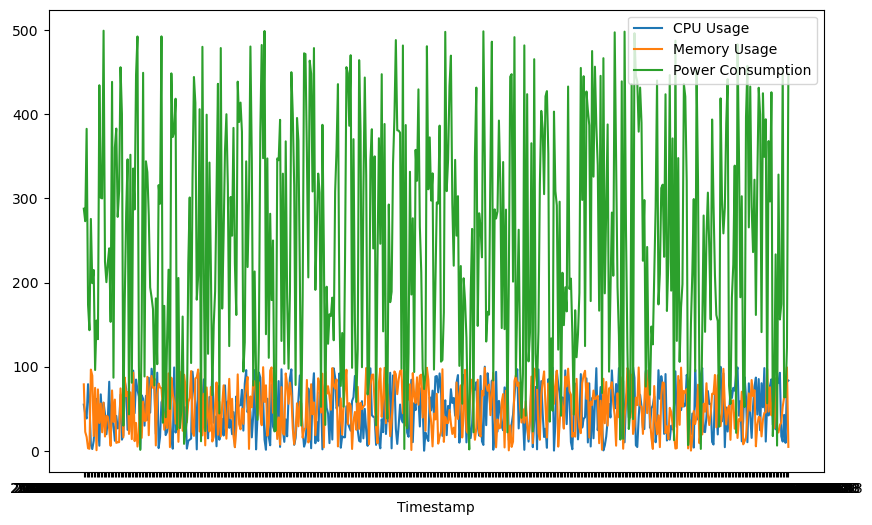

In [101]:
plt.figure(figsize=(10, 6))
plt.plot(Cloud_data['timestamp'][:500], Cloud_data['cpu_usage'][:500], label='CPU Usage')
plt.plot(Cloud_data['timestamp'][:500], Cloud_data['memory_usage'][:500], label='Memory Usage')
plt.plot(Cloud_data['timestamp'][:500], Cloud_data['power_consumption'][:500], label='Power Consumption')
plt.xlabel('Timestamp')
plt.legend()
plt.show()

## Dealing with Timestamps

In [102]:
#coveting col to datetime
Cloud_data['timestamp'] = pd.to_datetime(Cloud_data['timestamp'])
Cloud_data['hour_of_day'] = Cloud_data['timestamp'].dt.hour
Cloud_data['day_of_week'] = Cloud_data['timestamp'].dt.dayofweek  # Monday=0, Sunday=6
Cloud_data['timestamp']

0         2023-01-25 09:10:54
6         2023-06-15 18:04:04
9         2023-07-10 11:32:51
10        2023-01-14 19:59:41
12        2023-04-11 22:45:15
                  ...        
1999992   2023-07-04 15:55:56
1999993   2023-06-13 00:38:23
1999995   2023-02-13 16:02:13
1999997   2023-03-28 19:12:09
1999998   2023-02-27 21:13:16
Name: timestamp, Length: 565039, dtype: datetime64[ns]

In [103]:
#historical ussage patterns
Cloud_data['cpu_usage_7d_avg'] = Cloud_data['cpu_usage'].rolling(window=7, min_periods=1).mean()

Cloud_data['memory_usage_7d_avg'] = Cloud_data['memory_usage'].rolling(window=7, min_periods=1).mean()

Cloud_data.sort_values('timestamp', inplace=True)

#check
print(Cloud_data.head())

                                        vm_id           timestamp  cpu_usage  \
898414   fe5e04e3-4ea4-48cf-a193-3f58abd147ed 2023-01-01 00:00:31  14.019569   
1505883  ca081259-cb36-4c07-a7db-5af5f8676930 2023-01-01 00:00:40  99.077509   
1189161  c8e53b6b-07aa-4166-b588-a0c46ce29f3a 2023-01-01 00:01:09  89.889006   
831735   f190f9e4-8b34-4538-9dc6-e418616ae32e 2023-01-01 00:01:56  99.513676   
1477338  6af81feb-2422-4574-bc7d-6f4487ad0862 2023-01-01 00:02:33  30.082095   

         memory_usage  network_traffic  power_consumption  \
898414      74.367251       600.520958         368.735533   
1505883     71.444353       760.884810         196.374567   
1189161      5.710089       453.161356         310.077375   
831735      57.289428       672.079977          18.341540   
1477338     98.245805       852.144664          10.868683   

         num_executed_instructions  execution_time  energy_efficiency  \
898414                      8240.0       50.742393           0.639539   
150588

In [104]:
#checking whether historical ussage patterns are calculated or not
#Check for NaN Values
print("NaN values in 'cpu_usage_7d_avg':", Cloud_data['cpu_usage_7d_avg'].isnull().sum())
print("NaN values in 'memory_usage_7d_avg':", Cloud_data['memory_usage_7d_avg'].isnull().sum())

# Visual Inspection
print("\nFirst few rows for visual inspection:")
print(Cloud_data.head())
print("\nLast few rows for visual inspection:")
print(Cloud_data.tail())

NaN values in 'cpu_usage_7d_avg': 0
NaN values in 'memory_usage_7d_avg': 0

First few rows for visual inspection:
                                        vm_id           timestamp  cpu_usage  \
898414   fe5e04e3-4ea4-48cf-a193-3f58abd147ed 2023-01-01 00:00:31  14.019569   
1505883  ca081259-cb36-4c07-a7db-5af5f8676930 2023-01-01 00:00:40  99.077509   
1189161  c8e53b6b-07aa-4166-b588-a0c46ce29f3a 2023-01-01 00:01:09  89.889006   
831735   f190f9e4-8b34-4538-9dc6-e418616ae32e 2023-01-01 00:01:56  99.513676   
1477338  6af81feb-2422-4574-bc7d-6f4487ad0862 2023-01-01 00:02:33  30.082095   

         memory_usage  network_traffic  power_consumption  \
898414      74.367251       600.520958         368.735533   
1505883     71.444353       760.884810         196.374567   
1189161      5.710089       453.161356         310.077375   
831735      57.289428       672.079977          18.341540   
1477338     98.245805       852.144664          10.868683   

         num_executed_instructions  ex

# Time Series Analysis

## Trend Analysis

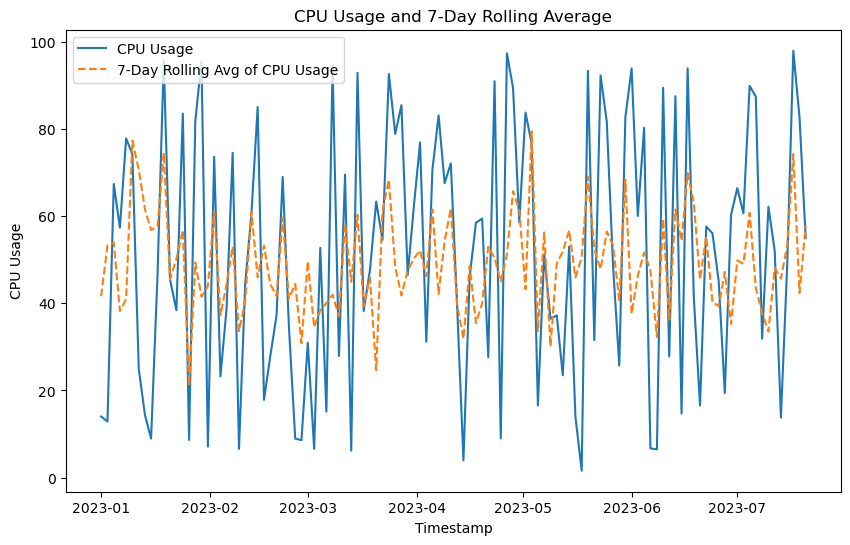

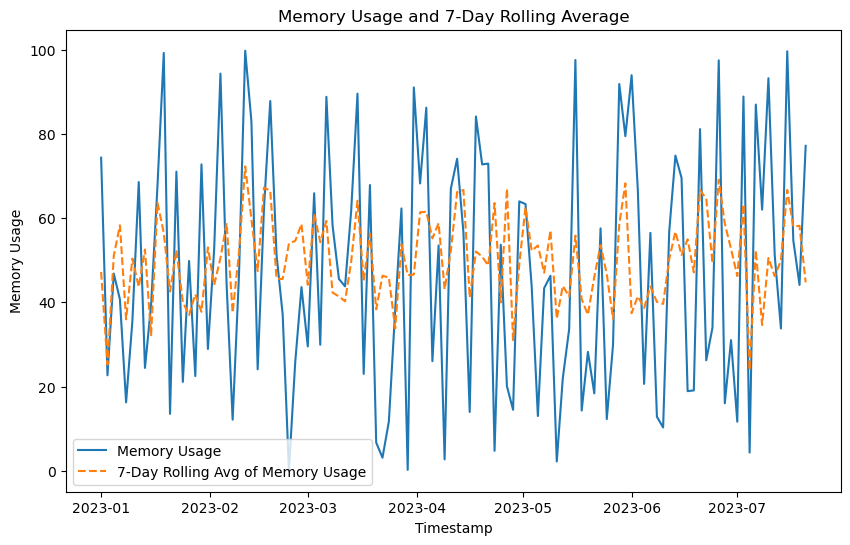

In [105]:
# Plotting the calculations
import matplotlib.pyplot as plt

# Plotting CPU Usage and its 7-day rolling avg
plt.figure(figsize=(10, 6))
plt.plot(Cloud_data['timestamp'][::5000], Cloud_data['cpu_usage'][::5000], label='CPU Usage')
plt.plot(Cloud_data['timestamp'][::5000], Cloud_data['cpu_usage_7d_avg'][::5000], label='7-Day Rolling Avg of CPU Usage', linestyle='--')
plt.xlabel('Timestamp')
plt.ylabel('CPU Usage')
plt.title('CPU Usage and 7-Day Rolling Average')
plt.legend()
plt.show()

#plotting the memory ussage and its 7-day rolling avg
plt.figure(figsize=(10, 6))
plt.plot(Cloud_data['timestamp'][::5000], Cloud_data['memory_usage'][::5000], label='Memory Usage')
plt.plot(Cloud_data['timestamp'][::5000], Cloud_data['memory_usage_7d_avg'][::5000], label='7-Day Rolling Avg of Memory Usage', linestyle='--')
plt.xlabel('Timestamp')
plt.ylabel('Memory Usage')
plt.title('Memory Usage and 7-Day Rolling Average')
plt.legend()
plt.show()

## Seasonality Analysis

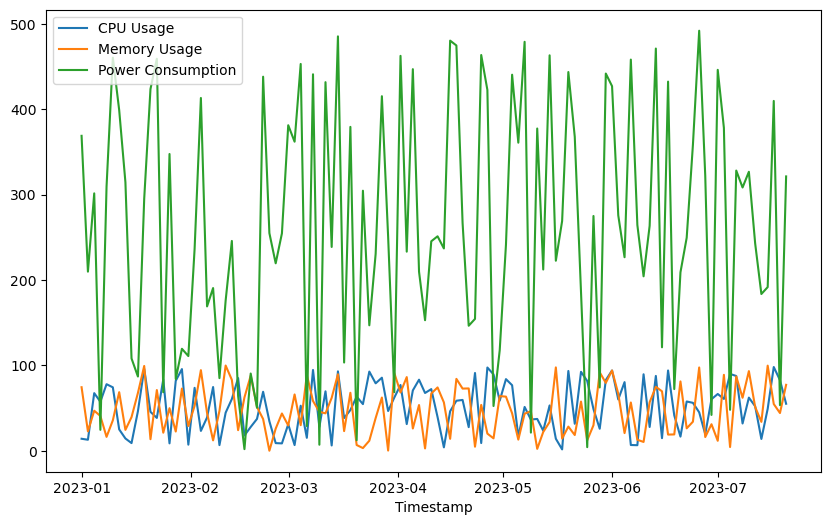

In [106]:
plt.figure(figsize=(10, 6))
plt.plot(Cloud_data['timestamp'][::5000], Cloud_data['cpu_usage'][::5000], label='CPU Usage')
plt.plot(Cloud_data['timestamp'][::5000], Cloud_data['memory_usage'][::5000], label='Memory Usage')
plt.plot(Cloud_data['timestamp'][::5000], Cloud_data['power_consumption'][::5000], label='Power Consumption')
plt.xlabel('Timestamp')
plt.legend()
plt.show()


Shall we try by changing the intervals\?

# Data Preprocessing and Cleaning

## Scaling the data

In [107]:
from sklearn.preprocessing import MinMaxScaler

Cloud_data.fillna(Cloud_data.mean(numeric_only=True), inplace=True)

# missing values and stuff
for column in ['task_type', 'task_priority', 'task_status']:
    Cloud_data[column] = Cloud_data[column].fillna(Cloud_data[column].mode()[0])
    
columns_to_normalize = ['cpu_usage', 'memory_usage', 'network_traffic', 'power_consumption', 'num_executed_instructions', 'execution_time', 'energy_efficiency']

#using the min max scaler
scaler = MinMaxScaler()

Cloud_data[columns_to_normalize] = scaler.fit_transform(Cloud_data[columns_to_normalize])

#check 
print(Cloud_data.head())

In [108]:
plt.Figure()
plt.plot(Cloud_data["cpu_usage"][:10])
plt.plot(Cloud_data["memory_usage"][:10])
plt.plot(Cloud_data["power_consumption"][:10])
# plt.xticks(rotation=90)
plt.legend()
plt.show()

In [109]:
# Check Data Types
print("\nData types of each column:")
print(Cloud_data.dtypes)

#Check Normalization
print("\nMin and Max values for normalized columns:")
for column in ['cpu_usage', 'memory_usage', 'network_traffic', 'power_consumption', 'num_executed_instructions', 'execution_time', 'energy_efficiency']:
    print(f"{column}: Min = {Cloud_data[column].min()}, Max = {Cloud_data[column].max()}")

#Inspection
# Display the first few rows of the DataFrame
print("\nFirst few rows for visual inspection:")
print(Cloud_data.head())

## Dividing by task_type

In [110]:
Cloud_data["task_type"].value_counts()

network    188569
io         188302
compute    188168
Name: task_type, dtype: int64

In [111]:
chosen_task = 'io'

In [112]:
Cloud_data = Cloud_data[Cloud_data["task_type"]==chosen_task]

In [113]:
Cloud_data = Cloud_data.drop(["task_type"], axis=1)

In [114]:
Cloud_data.head()

,vm_id,timestamp,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency,task_priority,task_status,hour_of_day,day_of_week,cpu_usage_7d_avg,memory_usage_7d_avg
1805900,b9d85db5-0eb1-4c7d-9247-ca36319ab282,2023-01-01 00:06:30,25.616200,87.486483,128.073805,213.206837,485.0,69.411436,0.414835,low,completed,0,6,47.817599,62.070849
1811963,53cb4050-49b6-4fe3-91fe-93f88cc66879,2023-01-01 00:07:54,61.408974,71.667044,476.167103,91.148885,3827.0,64.897799,0.968476,low,completed,0,6,52.178014,46.834384
1162587,a076b75b-7710-41f7-8481-7e65eb14a181,2023-01-01 00:12:14,11.423586,0.271508,371.019432,38.926974,2810.0,8.513676,0.071377,low,waiting,0,6,43.025544,51.066117
1244630,96cf1c48-e1c3-4128-b17e-b7d6a6f35417,2023-01-01 00:12:46,70.015453,96.732101,576.812413,81.224405,4661.0,30.182245,0.125340,high,running,0,6,46.857797,43.971933
1616229,2e8fd4d0-0a78-49c1-bf54-b5a591fe77e9,2023-01-01 00:13:40,59.678948,5.514019,403.946341,242.847384,7289.0,32.228388,0.778862,high,running,0,6,38.302127,48.498068


In [115]:
Cloud_data.tail()

,vm_id,timestamp,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency,task_priority,task_status,hour_of_day,day_of_week,cpu_usage_7d_avg,memory_usage_7d_avg
64081,742d3b6c-6223-430e-859a-ce602e9d9cd9,2023-07-20 11:50:43,71.048564,33.996321,919.128353,320.643999,4563.0,63.779219,0.677614,high,completed,11,3,70.005459,54.019757
383815,748c0fc8-e13e-48e4-bee7-8a3a8182faa6,2023-07-20 11:50:45,74.166826,44.133320,284.892730,298.022824,4473.0,91.960605,0.812834,high,running,11,3,47.429323,56.298179
1420160,718bffba-ec61-4f70-be28-a8019c9cdfc2,2023-07-20 11:57:10,75.376424,77.648539,682.879210,418.654415,7673.0,58.486214,0.180293,high,completed,11,3,65.357825,55.874592
614448,7fb20445-80fc-463d-be81-f7e875ff83b3,2023-07-20 11:59:02,45.354674,83.249790,425.055500,210.400066,7536.0,77.804053,0.060544,high,completed,11,3,54.867189,50.721911
1014943,a87d8c88-2c17-48e4-a3f7-bae5dcdd7961,2023-07-20 12:04:01,13.241330,93.255252,257.250961,95.518480,5911.0,93.177284,0.498501,medium,running,12,3,41.839651,52.293241


Time series analysis of this data can yield some results. 
1) Level: The base value for the series if it were a straight line.
2) Trend: The linear increasing or decreasing behavior of the series over time.
3) Seasonality: The repeating patterns or cycles of behavior over time.
4) Noise: The variability in the observations that cannot be explained by the model.

All-time series generally have a level, noise, while trend and seasonality are optional.

The main features of many time series are trends and seasonal variation. Another feature of most time series is that observations close together in time tend to be correlated.

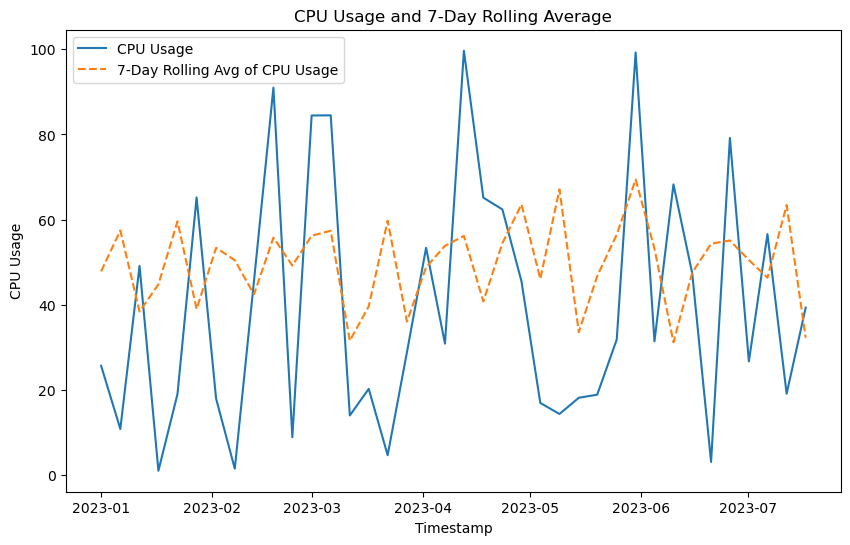

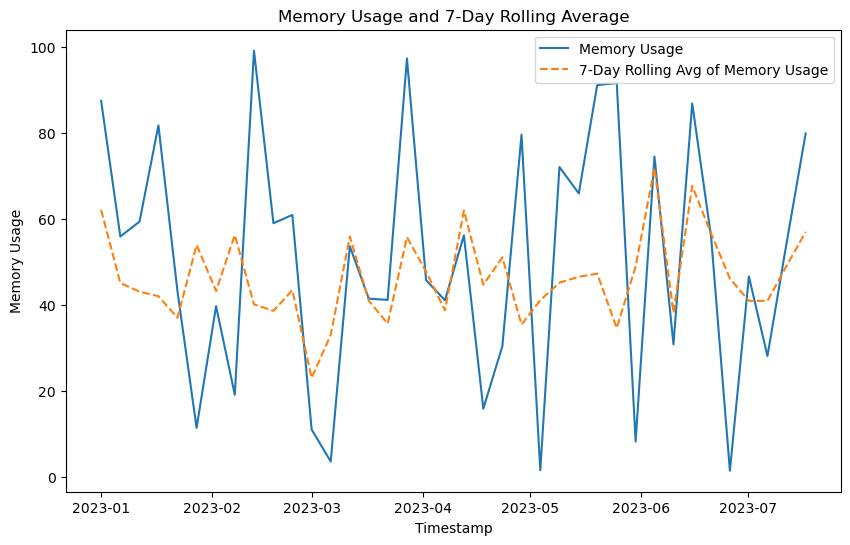

In [116]:
# Plotting CPU Usage and its 7-day rolling avg
plt.figure(figsize=(10, 6))
plt.plot(Cloud_data['timestamp'][::5000], Cloud_data['cpu_usage'][::5000], label='CPU Usage')
plt.plot(Cloud_data['timestamp'][::5000], Cloud_data['cpu_usage_7d_avg'][::5000], label='7-Day Rolling Avg of CPU Usage', linestyle='--')
plt.xlabel('Timestamp')
plt.ylabel('CPU Usage')
plt.title('CPU Usage and 7-Day Rolling Average')
plt.legend()
plt.show()

#plotting the memory ussage and its 7-day rolling avg
plt.figure(figsize=(10, 6))
plt.plot(Cloud_data['timestamp'][::5000], Cloud_data['memory_usage'][::5000], label='Memory Usage')
plt.plot(Cloud_data['timestamp'][::5000], Cloud_data['memory_usage_7d_avg'][::5000], label='7-Day Rolling Avg of Memory Usage', linestyle='--')
plt.xlabel('Timestamp')
plt.ylabel('Memory Usage')
plt.title('Memory Usage and 7-Day Rolling Average')
plt.legend()
plt.show()

## Train-test splitting and encoding

In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [118]:
# Encode categorical variables
label_encoder = LabelEncoder()
Cloud_data['task_priority_encoded'] = label_encoder.fit_transform(Cloud_data['task_priority'])
Cloud_data['task_status_encoded'] = label_encoder.fit_transform(Cloud_data['task_status'])

# Drop original categorical columns and 'timestamp'
Cloud_data_processed = Cloud_data.drop(['timestamp', 'task_priority', 'task_status'], axis=1)

In [119]:
# Features (excluding target variables and 'vm_id' if it's not used as a feature)
X = Cloud_data_processed.drop(['cpu_usage', 'memory_usage', 'network_traffic', 'vm_id'], axis=1)

# Targets
y = Cloud_data_processed[['cpu_usage', 'memory_usage', 'network_traffic']]

In [120]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shape of the splits
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

In [121]:
print("Feature names:", X_train.columns.tolist())

# Training a random forest regressor model

In [29]:

from sklearn.ensemble import RandomForestRegressor


predictions_rf = {}

# Train RandomForest model for each target
for target in y_train.columns:
    # RandomForest
    model_rf = RandomForestRegressor(n_estimators=10, random_state=42)
    model_rf.fit(X_train, y_train[target])
    # Assuming you want to keep the RandomForest models as well, you could store them similarly to models_lgbm
    predictions_rf[target] = model_rf.predict(X_test)

# Example evaluation with RMSE for combined predictions
from sklearn.metrics import mean_squared_error
import numpy as np

for target in y_train.columns:
    # rmse = np.sqrt(mean_squared_error(y_test[target], y_pred_combined_df[target]))
    rmse = np.sqrt(mean_squared_error(y_test[target], predictions_rf[target]))
    print(f"RMSE for {target}: {rmse}")


Combined RMSE for cpu_usage: 0.28203141120335184
Combined RMSE for memory_usage: 0.28349748074360714
Combined RMSE for network_traffic: 0.3037954902837974


----------------------